# **Diabetics Prediction Model**

In [ ]:
# Install necessary modules
!pip install pycaret

In [ ]:
!pip install streamlit

In [3]:
# Import necessary modules
from pycaret.classification import *
import streamlit as st
import pandas as pd
import numpy as np

In [4]:
# Load data
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
# Transform water quality feature into binary (safe or not_safe)
diabetes_df.Outcome = np.where(diabetes_df.Outcome>= 1,'Not Diabetic', 'Diabetic')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Not Diabetic
1,1,85,66,29,0,26.6,0.351,31,Diabetic
2,8,183,64,0,0,23.3,0.672,32,Not Diabetic
3,1,89,66,23,94,28.1,0.167,21,Diabetic
4,0,137,40,35,168,43.1,2.288,33,Not Diabetic


In [6]:
len(diabetes_df[diabetes_df['Outcome']==1])

0

In [7]:
len(diabetes_df[diabetes_df['Outcome']==0])

0

In [8]:
# find the minimum of each column
minValues = print(diabetes_df.min())

Pregnancies                        0
Glucose                            0
BloodPressure                      0
SkinThickness                      0
Insulin                            0
BMI                              0.0
DiabetesPedigreeFunction       0.078
Age                               21
Outcome                     Diabetic
dtype: object


In [9]:
maxValues = print(diabetes_df.max())

Pregnancies                           17
Glucose                              199
BloodPressure                        122
SkinThickness                         99
Insulin                              846
BMI                                 67.1
DiabetesPedigreeFunction            2.42
Age                                   81
Outcome                     Not Diabetic
dtype: object


In [10]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [11]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [12]:
#Applying preprocessing techniques
diabetes_df_model = setup(diabetes_df, target = 'Outcome', session_id = 123, use_gpu = True, fix_imbalance = True,
           normalize = True,
           polynomial_features = True, trigonometry_features = True, feature_interaction=True)

,Description,Value
0,session_id,123
1,Target,Outcome
2,Target Type,Binary
3,Label Encoded,"Diabetic: 0, Not Diabetic: 1"
4,Original Data,"(768, 9)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
2022-10-01 18:30:33.163 INFO    logs: create_model_container: 0
INFO:logs:master_model_container: 0
2022-10-01 18:30:33.168 INFO    logs: master_model_container: 0
INFO:logs:display_container: 1
2022-10-01 18:30:33.172 INFO    logs: display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Outcome',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                num

In [13]:
#diabetes_df_model = compare_models()

In [14]:
diabetes_df_model = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7222,0.7253,0.6667,0.5714,0.6154,0.4000,0.4029
1,0.7222,0.7369,0.5000,0.6000,0.5455,0.3478,0.3508
2,0.7222,0.7762,0.5000,0.6000,0.5455,0.3478,0.3508
3,0.6667,0.7608,0.3889,0.5000,0.4375,0.2059,0.2092
4,0.6667,0.6867,0.3889,0.5000,0.4375,0.2059,0.2092
5,0.7593,0.8835,0.7222,0.6190,0.6667,0.4800,0.4835
6,0.8148,0.8565,0.6667,0.7500,0.7059,0.5714,0.5735
7,0.7736,0.7754,0.6111,0.6875,0.6471,0.4812,0.4830
8,0.7547,0.7976,0.8333,0.6000,0.6977,0.5004,0.5195


INFO:logs:create_model_container: 1
2022-10-01 18:30:55.639 INFO    logs: create_model_container: 1
INFO:logs:master_model_container: 1
2022-10-01 18:30:55.653 INFO    logs: master_model_container: 1
INFO:logs:display_container: 2
2022-10-01 18:30:55.660 INFO    logs: display_container: 2
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
2022-10-01 18:30:55.672 INFO    logs: ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_fe

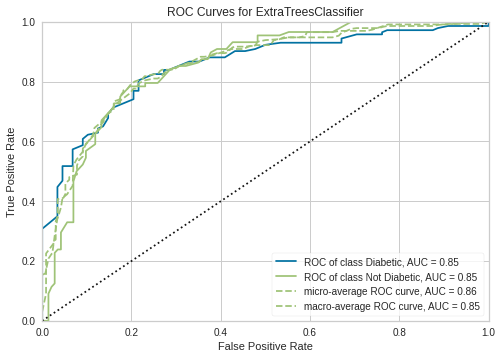

INFO:logs:Visual Rendered Successfully
2022-10-01 18:30:56.988 INFO    logs: Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................
2022-10-01 18:30:57.109 INFO    logs: plot_model() succesfully completed......................................


In [15]:
plot_model(diabetes_df_model)

In [16]:
save_model(diabetes_df_model, 'diabetes_deployment_model')

INFO:logs:Initializing save_model()
2022-10-01 18:30:57.147 INFO    logs: Initializing save_model()
INFO:logs:save_model(model=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False), model_name=diabetes_deployment_model, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='c

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Outcome',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nod

In [17]:
#Creating the web app with streamlit
from pycaret.classification import load_model, predict_model
import streamlit as st
import pandas as pd
import numpy as np


def predict_quality(model, df):
    
    predictions_data = predict_model(estimator = model, data = df)
    
    return predictions_data['Label'][0]
    
model = load_model('diabetes_deployment_model')

st.title("Diabetes Predictive Framework")
st.write('This framework is created to predict diabetes in hospital clients')

Pregnancies = st.sidebar.slider('Pregnancies', 
                                min_value=0.00, 
                                max_value=20.00, value=0.00, 
                                step = 1.00)

Glucose = st.number_input('Glucose', 
                          min_value=0.00, 
                          max_value=250.00, 
                          value=50.00)

BloodPressure = st.number_input('BloodPressure', 
                                min_value=0.00, 
                                max_value=200.00, 
                                value=120.00)

SkinThickness = st.number_input('SkinThickness', 
                                min_value=0.00, 
                                max_value=100.00, 
                                value=60.00)

Insulin = st.number_input('Insulin', 
                          min_value=0.00, 
                          max_value=1000.00, 
                          value=200.00)

BMI = st.number_input('BMI', 
                      min_value=0.00, 
                      max_value=100.00, 
                      value=50.00)

DiabetesPedigreeFunction = st.number_input('DiabetesPedigreeFunction', 
                                           min_value=0.01, 
                                           max_value=10.00, 
                                           value=1.00) 

Age = st.sidebar.slider('Age', 
                        min_value=1.00, 
                        max_value=150.00, 
                        value=60.00, 
                        step = 1.00)


features = {'Pregnancies': Pregnancies, 'Glucose': Glucose,
            'BloodPressure': BloodPressure, 'SkinThickness': SkinThickness,
            'Insulin': Insulin, 'BMI': BMI,
            'DiabetesPedigreeFunction': DiabetesPedigreeFunction, 'Age': Age,
            }
 

features_df  = pd.DataFrame([features])

st.table(features_df)  

if st.button('Predict'):
    
    prediction = predict_quality(model, features_df)
    
    st.write('Based on values provided, the patient is:'+ str(prediction))

INFO:logs:Initializing load_model()
2022-10-01 18:30:57.454 INFO    logs: Initializing load_model()
INFO:logs:load_model(model_name=diabetes_deployment_model, platform=None, authentication=None, verbose=True)
2022-10-01 18:30:57.461 INFO    logs: load_model(model_name=diabetes_deployment_model, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded


  command:

    streamlit run /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py [ARGUMENTS]
2022-10-01 18:30:57.767 
  command:

    streamlit run /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py [ARGUMENTS]
